In [0]:
from google.colab import files

In [2]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_excel('merged_correlation.xlsx')
df.head()

,Location,Year,Quarter,Total_cases,New_smear_positive_cases,so2,no2,rspm,rainfall,relative_humidity,average_temperature
0,HIMACHALPRADESH_LAHAULANDSPITI,2001,1,8,3,NaN,NaN,NaN,292.8,52.993502,10.896160
1,HIMACHALPRADESH_KANGRA,2001,1,500,166,1.95,2.450000,NaN,86.4,32.625065,12.959197
2,HIMACHALPRADESH_MANDI,2001,1,609,233,NaN,NaN,NaN,115.9,33.534931,13.101363
3,HIMACHALPRADESH_SHIMLA,2001,1,267,90,2.55,10.166667,NaN,140.1,35.653702,13.525538
4,HIMACHALPRADESH_HAMIRPUR,2001,1,258,107,NaN,NaN,NaN,73.9,29.772431,13.679608


In [5]:
df.describe()

,Year,Quarter,Total_cases,New_smear_positive_cases,so2,no2,rspm,rainfall,relative_humidity,average_temperature
count,36457.000000,36457.000000,36457.000000,36457.000000,6261.000000,6389.000000,5959.000000,36058.000000,36250.000000,36250.000000
mean,2010.269386,2.516801,554.624517,235.039663,11.204978,24.139886,104.121530,324.967910,60.158945,24.994465
std,4.881157,1.117911,497.521046,199.341110,8.724810,13.366469,55.685423,411.419517,20.187203,4.937246
min,2001.000000,1.000000,0.000000,0.000000,1.459375,2.450000,3.000000,0.000000,18.211706,-10.741935
25%,2006.000000,2.000000,246.000000,104.000000,5.275000,14.153846,65.000000,39.400000,42.197622,21.741722
50%,2010.000000,3.000000,446.000000,188.000000,8.860759,21.703704,91.673077,146.650000,62.674663,25.265842
75%,2015.000000,4.000000,726.000000,310.000000,15.071429,30.666667,129.000000,485.175000,78.410287,28.806779
max,2018.000000,4.000000,8293.000000,2355.000000,113.000000,131.775000,568.000000,4312.600000,93.732401,35.933925


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  36457 non-null  object 
 1   Year                      36457 non-null  int64  
 2   Quarter                   36457 non-null  int64  
 3   Total_cases               36457 non-null  int64  
 4   New_smear_positive_cases  36457 non-null  int64  
 5   so2                       6261 non-null   float64
 6   no2                       6389 non-null   float64
 7   rspm                      5959 non-null   float64
 8   rainfall                  36058 non-null  float64
 9   relative_humidity         36250 non-null  float64
 10  average_temperature       36250 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 3.1+ MB


In [7]:
df.isnull().sum()

Location                        0
Year                            0
Quarter                         0
Total_cases                     0
New_smear_positive_cases        0
so2                         30196
no2                         30068
rspm                        30498
rainfall                      399
relative_humidity             207
average_temperature           207
dtype: int64

In [8]:
df[['so2','no2','rspm']].describe()

,so2,no2,rspm
count,6261.000000,6389.000000,5959.000000
mean,11.204978,24.139886,104.121530
std,8.724810,13.366469,55.685423
min,1.459375,2.450000,3.000000
25%,5.275000,14.153846,65.000000
50%,8.860759,21.703704,91.673077
75%,15.071429,30.666667,129.000000
max,113.000000,131.775000,568.000000


In [11]:
df[['Total_cases','New_smear_positive_cases','Year','Quarter','rainfall','relative_humidity','average_temperature','so2','no2','rspm']].dropna()

,Total_cases,New_smear_positive_cases,Year,Quarter,rainfall,relative_humidity,average_temperature,so2,no2,rspm
1839,776,312,2003,1,119.2,43.269474,14.962366,11.032258,32.376344,210.860215
1883,392,141,2003,1,50.6,42.235764,17.241052,9.450331,40.276316,131.590909
1911,211,83,2003,1,50.6,42.235764,17.241052,9.450331,40.276316,131.590909
1913,75,25,2003,1,50.6,42.235764,17.241052,9.450331,40.276316,131.590909
1914,789,303,2003,1,50.6,42.235764,17.241052,9.450331,40.276316,131.590909
...,...,...,...,...,...,...,...,...,...,...
29502,1163,624,2015,4,9.7,43.334391,22.048190,18.913580,36.543210,159.666667
29503,1041,343,2015,4,66.3,74.171760,25.371935,2.000000,18.615385,74.153846
29504,1371,401,2015,4,30.7,36.814928,22.361308,3.783069,29.273684,270.215790
29509,448,279,2015,4,59.5,54.169050,22.343978,17.960000,27.753043,142.272500


In [0]:
rspm_good=df[df['rspm']<=50]
rspm_satisfactory=df[df['rspm'].between(51, 100,inclusive=True)]
rspm_moderate=df[df['rspm'].between(101, 200,inclusive=True)]
rspm_poor=df[df['rspm'].between(201, 300,inclusive=True)]
rspm_severe=df[df['rspm']>300]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

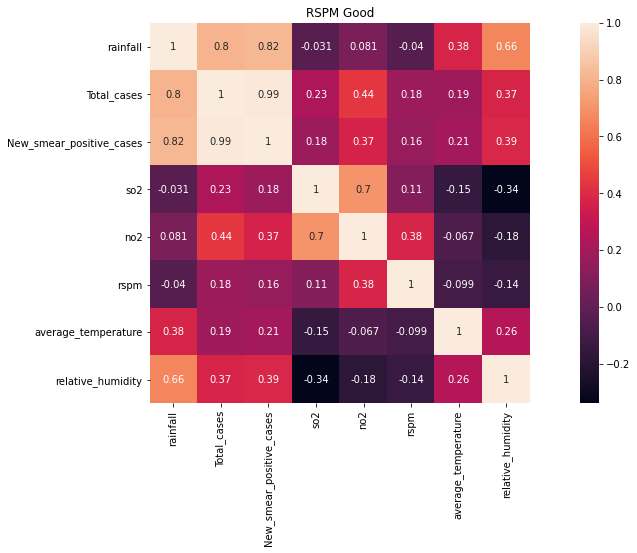

In [40]:
rspm_good['str_Year']=rspm_good['Year'].apply(str)
rspm_good['str_Year']=rspm_good['Year'].apply(str)
rspm_good['str_Year']
rspm_good['str_quarter']=rspm_good['Quarter'].apply(str)
rspm_good['timeline'] = rspm_good['str_Year'].str.cat(rspm_good['str_quarter'])
df_new = rspm_good.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = rspm_good.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T]
columns1 = result1.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('RSPM Good')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

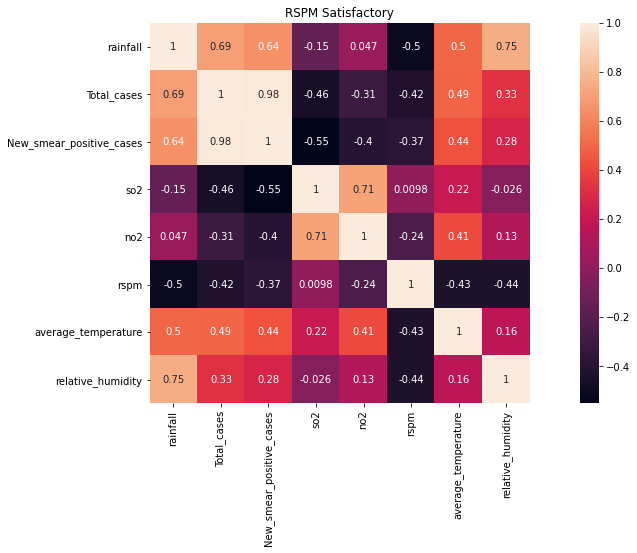

In [41]:
rspm_satisfactory['str_Year']=rspm_satisfactory['Year'].apply(str)
rspm_satisfactory['str_Year']=rspm_satisfactory['Year'].apply(str)
rspm_satisfactory['str_Year']
rspm_satisfactory['str_quarter']=rspm_satisfactory['Quarter'].apply(str)
rspm_satisfactory['timeline'] = rspm_satisfactory['str_Year'].str.cat(rspm_satisfactory['str_quarter'])
df_new = rspm_satisfactory.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = rspm_satisfactory.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
columns1 = result1.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('RSPM Satisfactory')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

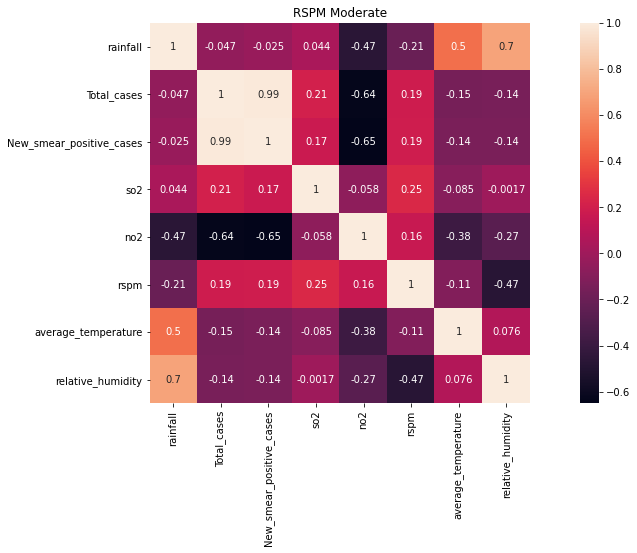

In [42]:
rspm_moderate['str_Year']=rspm_moderate['Year'].apply(str)
rspm_moderate['str_Year']=rspm_moderate['Year'].apply(str)
rspm_moderate['str_Year']
rspm_moderate['str_quarter']=rspm_moderate['Quarter'].apply(str)
rspm_moderate['timeline'] = rspm_moderate['str_Year'].str.cat(rspm_moderate['str_quarter'])
df_new = rspm_moderate.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = rspm_moderate.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T]
columns1 = result1.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('RSPM Moderate')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

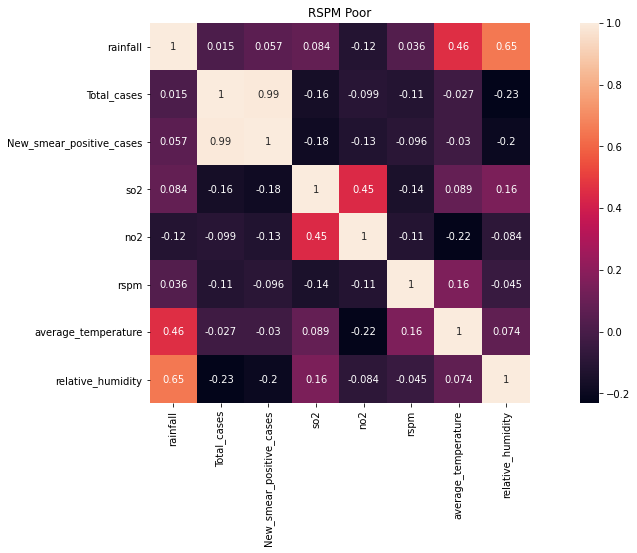

In [43]:
rspm_poor['str_Year']=rspm_poor['Year'].apply(str)
rspm_poor['str_Year']=rspm_poor['Year'].apply(str)
rspm_poor['str_Year']
rspm_poor['str_quarter']=rspm_poor['Quarter'].apply(str)
rspm_poor['timeline'] = rspm_poor['str_Year'].str.cat(rspm_poor['str_quarter'])
df_new = rspm_poor.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = rspm_poor.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
columns1 = result1.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('RSPM Poor')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

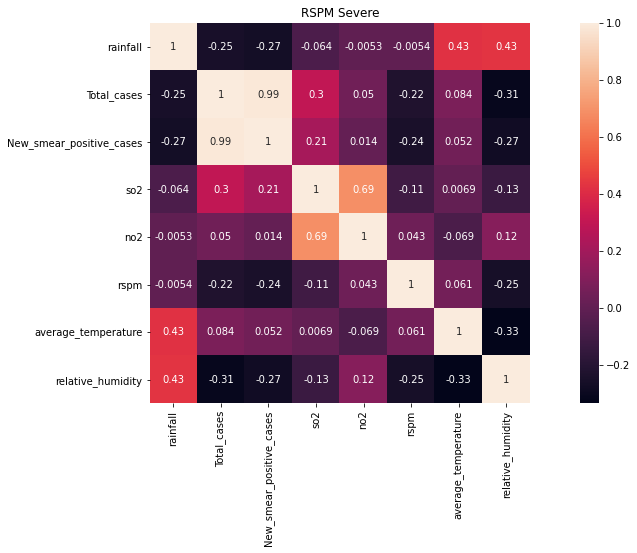

In [44]:
rspm_severe['str_Year']=rspm_severe['Year'].apply(str)
rspm_severe['str_Year']=rspm_severe['Year'].apply(str)
rspm_severe['str_Year']
rspm_severe['str_quarter']=rspm_severe['Quarter'].apply(str)
rspm_severe['timeline'] = rspm_severe['str_Year'].str.cat(rspm_severe['str_quarter'])
df_new = rspm_severe.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = rspm_severe.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
columns1 = result1.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('RSPM Severe')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

In [0]:
no2_safe=df[df['no2']<=25]
no2_potential=df[df['no2'].between(26, 50,inclusive=True)]
no2_curtailing=df[df['no2'].between(51, 100,inclusive=True)]
no2_hazardous=df[df['no2']>100]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

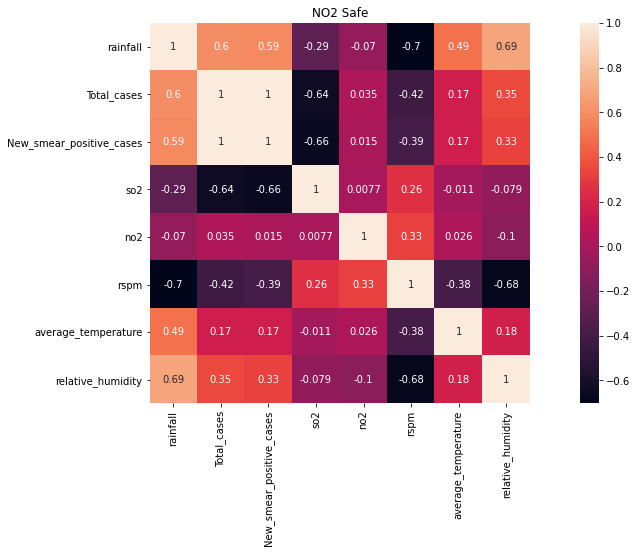

In [46]:
no2_safe['str_Year']=no2_safe['Year'].apply(str)
no2_safe['str_Year']=no2_safe['Year'].apply(str)
no2_safe['str_Year']
no2_safe['str_quarter']=no2_safe['Quarter'].apply(str)
no2_safe['timeline'] = no2_safe['str_Year'].str.cat(no2_safe['str_quarter'])
df_new = no2_safe.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = no2_safe.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('NO2 Safe')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

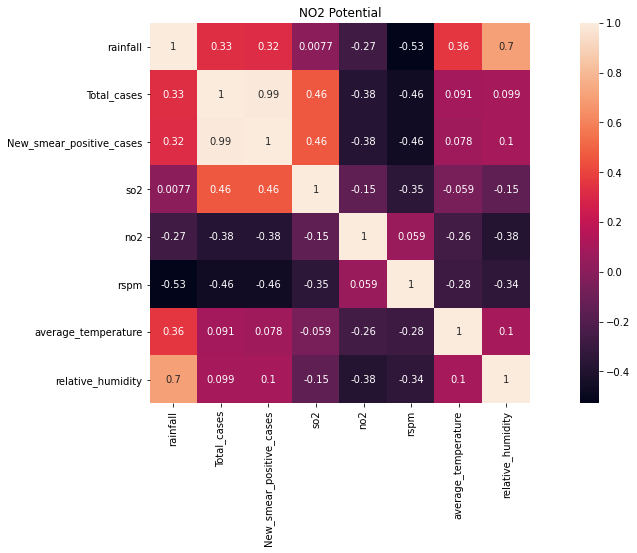

In [47]:
no2_potential['str_Year']=no2_potential['Year'].apply(str)
no2_potential['str_Year']=no2_potential['Year'].apply(str)
no2_potential['str_Year']
no2_potential['str_quarter']=no2_potential['Quarter'].apply(str)
no2_potential['timeline'] = no2_potential['str_Year'].str.cat(no2_potential['str_quarter'])
df_new = no2_potential.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = no2_potential.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('NO2 Potential')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

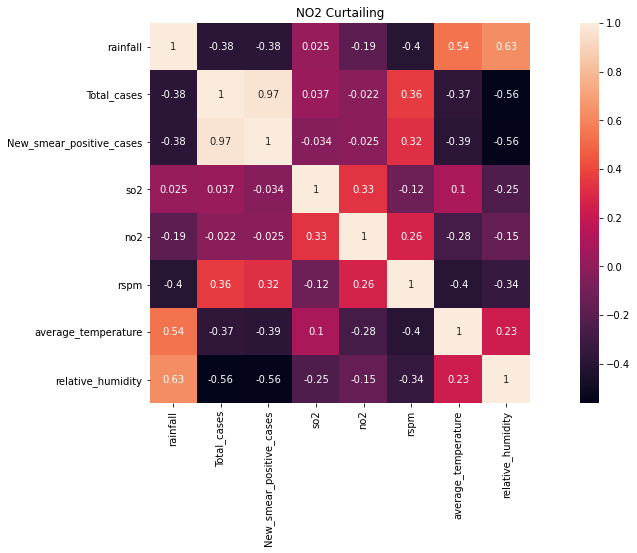

In [48]:
no2_curtailing['str_Year']=no2_curtailing['Year'].apply(str)
no2_curtailing['str_Year']=no2_curtailing['Year'].apply(str)
no2_curtailing['str_Year']
no2_curtailing['str_quarter']=no2_curtailing['Quarter'].apply(str)
no2_curtailing['timeline'] = no2_curtailing['str_Year'].str.cat(no2_curtailing['str_quarter'])
df_new = no2_curtailing.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = no2_curtailing.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('NO2 Curtailing')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

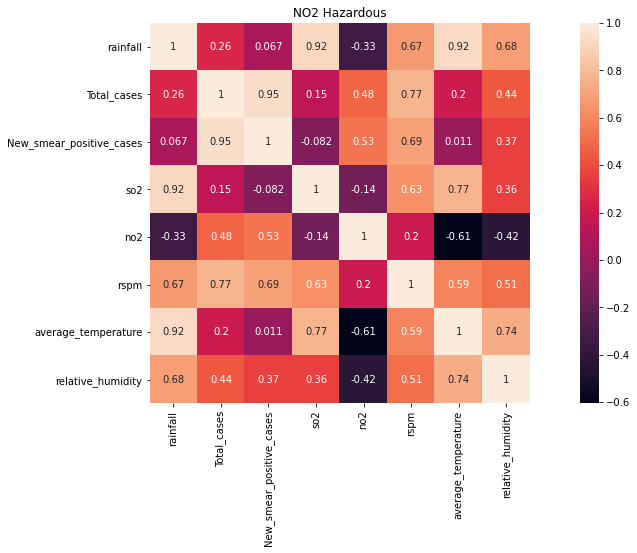

In [49]:
no2_hazardous['str_Year']=no2_hazardous['Year'].apply(str)
no2_hazardous['str_Year']=no2_hazardous['Year'].apply(str)
no2_hazardous['str_Year']
no2_hazardous['str_quarter']=no2_hazardous['Quarter'].apply(str)
no2_hazardous['timeline'] = no2_hazardous['str_Year'].str.cat(no2_hazardous['str_quarter'])
df_new = no2_hazardous.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = no2_hazardous.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('NO2 Hazardous')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

In [0]:
so2_safe=df[df['so2']<=25]
so2_potential=df[df['so2'].between(26, 50,inclusive=True)]
so2_curtailing=df[df['so2'].between(51, 100,inclusive=True)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

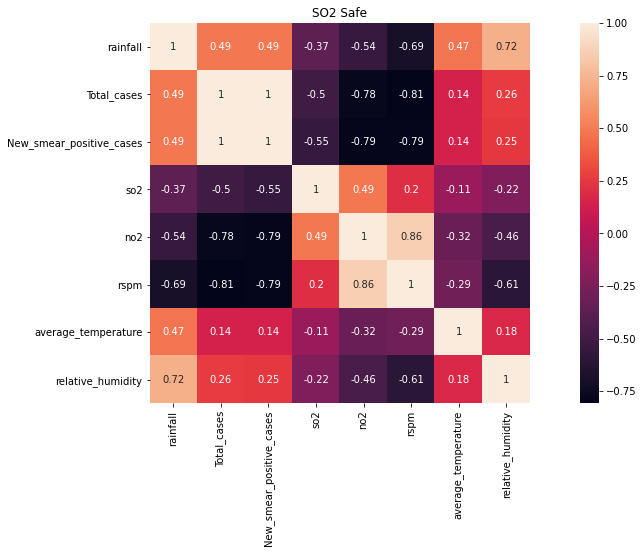

In [51]:
so2_safe['str_Year']=so2_safe['Year'].apply(str)
so2_safe['str_Year']=so2_safe['Year'].apply(str)
so2_safe['str_Year']
so2_safe['str_quarter']=so2_safe['Quarter'].apply(str)
so2_safe['timeline'] = so2_safe['str_Year'].str.cat(so2_safe['str_quarter'])
df_new = so2_safe.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = so2_safe.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('SO2 Safe')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

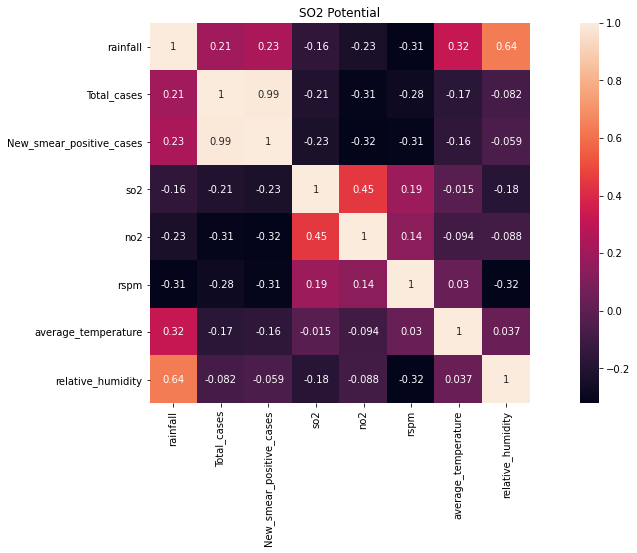

In [52]:
so2_potential['str_Year']=so2_potential['Year'].apply(str)
so2_potential['str_Year']=so2_potential['Year'].apply(str)
so2_potential['str_Year']
so2_potential['str_quarter']=so2_potential['Quarter'].apply(str)
so2_potential['timeline'] = so2_potential['str_Year'].str.cat(so2_potential['str_quarter'])
df_new = so2_potential.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = so2_potential.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('SO2 Potential')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

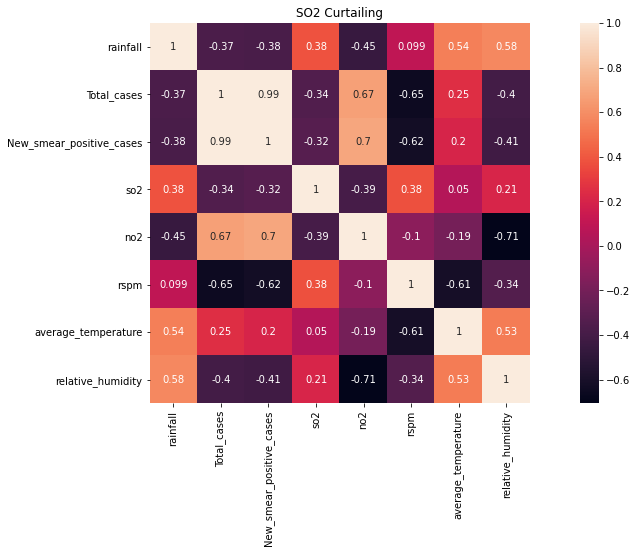

In [53]:
so2_curtailing['str_Year']=so2_curtailing['Year'].apply(str)
so2_curtailing['str_Year']=so2_curtailing['Year'].apply(str)
so2_curtailing['str_Year']
so2_curtailing['str_quarter']=so2_curtailing['Quarter'].apply(str)
so2_curtailing['timeline'] = so2_curtailing['str_Year'].str.cat(so2_curtailing['str_quarter'])
df_new = so2_curtailing.groupby('timeline')[['rainfall','Total_cases','New_smear_positive_cases']].sum()
df_new1 = so2_curtailing.groupby('timeline')[['so2','no2','rspm','average_temperature','relative_humidity']].mean()
df_new1
result1 = pd.concat([df_new, df_new1], axis=1, sort=False)
#DF_list = result['Total_cases'].tolist()
DF1_list = result1['Total_cases'].tolist()
#DF2_list = result2['Total_cases'].tolist()
#DF1 = df_main2.T
#DF = df_main.T
#columns = result.index
columns1 = result1.index
#columns2 = result2.index
fig, ax1 = plt.subplots(figsize=(18,7))
plt.title('SO2 Curtailing')
#plt.plot(columns,DF_list,'r-')
plt.plot(columns1,DF1_list,'g-')
#plt.plot(columns2,DF2_list,'b-')
corr = result1.corr()
sn.heatmap(corr,annot=True,square=True)
plt.show()